Let's first setup our imports

In [28]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
import re

## Step 1: Import and format the data

Sklearn already has the Iris dataset built in, so all we have to do is import it!

In [2]:
iris = load_iris()
print iris.keys()
print ''

iris_sublist = ['target_names', 'feature_names']
for i in iris_sublist:
    for x in iris[i]:
        print i + ": " + x

['target_names', 'data', 'target', 'DESCR', 'feature_names']

target_names: setosa
target_names: versicolor
target_names: virginica
feature_names: sepal length (cm)
feature_names: sepal width (cm)
feature_names: petal length (cm)
feature_names: petal width (cm)


Define the "x" and "y" variables. *Remember*, y is our classifer, and x is our attributes.

In [7]:
iris['target'].shape

(150,)

In [102]:
X = pd.DataFrame(iris['data'])
y = pd.DataFrame(iris['target'])

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X.columns = feature_names
X.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype=object)

In [ ]:
# feature_names = []
# for i in iris['feature_names']:
#     feature_names.append(i[:-5])

# WHY DOESN'T THIS WORK???    
# for i in feature_names:
# i.replace(" ", "_")

# for i in feature_names:
#     x = re.sub(r"\s+", "_", i)
#     feature_names.append(x)

## Step 2: Plot the data to estimate clusters

Plot the data using scatterplots - take a look at all the combinations of variables to get a feel for how the data is distributed. 

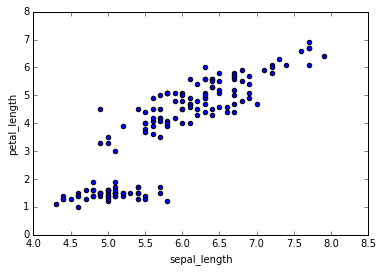

In [45]:
X.plot(kind='scatter', x='sepal_length', y='petal_length')

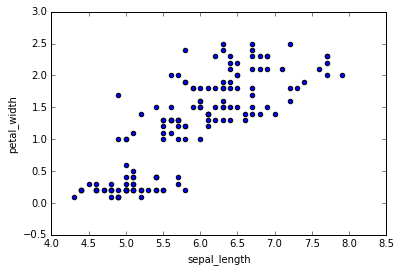

In [50]:
X.plot(kind='scatter', x='sepal_length', y='petal_width')

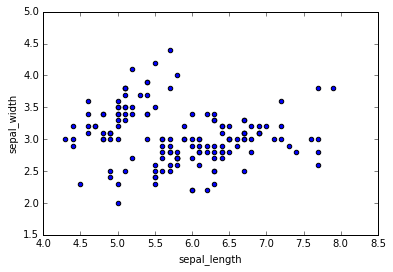

In [51]:
X.plot(kind='scatter', x='sepal_length', y='sepal_width')

## Step 3: Cluster the data

Run the clustering analysis using scikit-learn.

*Hint*: Estimate the number of clusters, k, based on your visual examination of the distributions.

In [78]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Compute the labels and centroids

In [79]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

## Step 4: Evaluate the clusters

First, go ahead and plot the results of your clustering analysis

Plot the clusters

In [119]:
iris_df = pd.DataFrame(iris['data'])
iris_df.columns = feature_names
iris_df['target'] = iris['target']

In [ ]:
# from solution code:

# for i in range(k):
#     ds = iris[np.where(labels==i)]
#     plt.plot(ds[:,0],ds[:,1],'o')
#     lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
#     plt.setp(lines,ms=15.0)
#     plt.setp(lines,mew=2.0)
# plt.show()

In [ ]:
for i in range(k):
    ds = iris_df[iris_df['target'] == i]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

Plot the predicted vs actual classifcations to see how our clustering analysis compares

In [93]:
y = np.asarray(y)

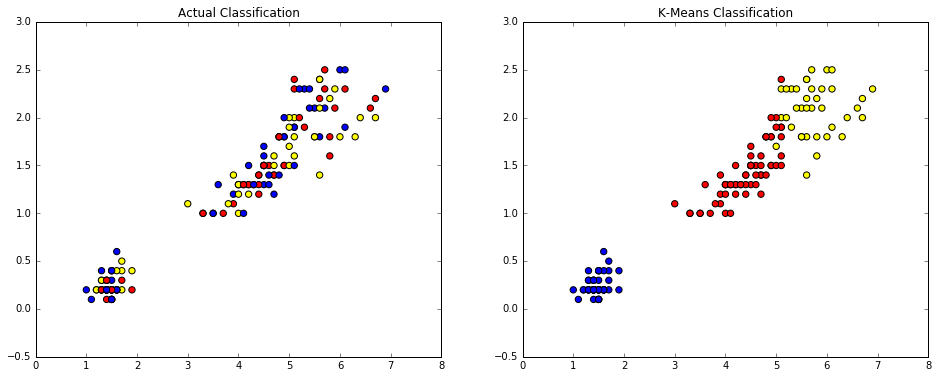

In [123]:
colormap = np.array(['red', 'blue', 'yellow'])
plt.subplots(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap, s=40)
plt.title('Actual Classification')
 
plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[labels], s=40)
plt.title('K-Means Classification')

Check the centroids to see where each cluster is lying 

In [124]:
print centroids

[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]


Check the labels of the clusters

In [125]:
print labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Compute the accuracy score using scikit to see how accurate our analysis is

In [126]:
metrics.accuracy_score(y, labels)

0.23999999999999999

Compute the silhoutte coefficient to see how consistent our data is within the clusters

In [127]:
metrics.silhouette_score(y, labels, metric='euclidean')

0.70172421600536772

Calculate the Precision, Recall, and F - Score to see the test's accuracy

In [131]:
print metrics.classification_report(y, labels)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        50
          1       0.00      0.00      0.00        50
          2       0.95      0.72      0.82        50

avg / total       0.32      0.24      0.27       150



Compute the Confusion Matrix to test the performance of the clustering analysis

In [132]:
pd.DataFrame(metrics.confusion_matrix(y, labels))

,0,1,2
0,0,50,0
1,48,0,2
2,14,0,36
